# Image Classification - MNIST Fashion Dataset

**We will try to build an image classifier with Keras and Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot


### Load Data

In [47]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

### Visualizing the Data

In [2]:
# import libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# get a sample image and plot to visualize
sample_image = x_train[0]
sample_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

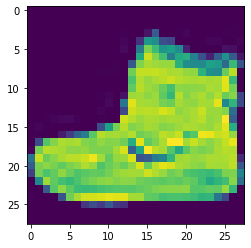

In [5]:
plt.imshow(sample_image)

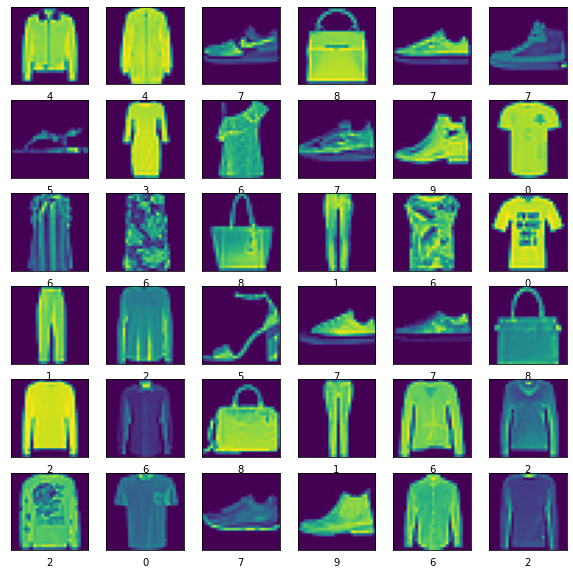

In [106]:
# randomly plot some images from X_train

plt.figure(figsize=(10,10))
random_inds = np.random.choice(60000,36)
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image_ind = random_inds[i]
    plt.imshow(np.squeeze(x_train[image_ind])) #, cmap=plt.cm.binary
    plt.xlabel(y_train[image_ind])

## Preprocessing the Data

**Normalizing the data**

In [48]:
# find the max and min values in the x_train dataset
x_train.max(), x_train.min()

(255, 0)

In [49]:
# scale and normalize the data
x_train = x_train/255
x_test = x_test/255

**Reshape the X arrays to include a 4 dimension of the single channel.**

In [50]:
# check the shape of the data
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [51]:
# reshape the datasets to 
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

In [52]:
# check the shape of the data
x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

**Now lets convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [19]:
# check values for the target labels
y_train[0:5]

array([9, 0, 0, 3, 0], dtype=uint8)

In [20]:
# import library from keras for one hot encoding
from tensorflow.keras.utils import to_categorical

In [53]:
# use one hot encoding to encode the target labels
y_cat_train = to_categorical(y_train, num_classes=10)
y_cat_test = to_categorical(y_test, num_classes=10)

In [54]:
# get the shape of an image to pass to model while training
input_shape = x_train[0].shape
input_shape

(28, 28, 1)

## Building the Model

In [23]:
# import libraries for model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping

In [95]:
# initialize model
model = Sequential()

# add Conv2D layer
model.add(Conv2D(filters = 32, kernel_size=(2,2), strides = (1,1), activation= 'relu', input_shape = input_shape))

# add maxpool
model.add(MaxPool2D(pool_size=(2,2)))

# flatten the input data images
model.add(Flatten())

# add Dense layer
model.add(Dense(128, activation='relu'))

# ouput layer
model.add(Dense(10, activation='softmax'))

# compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [96]:
# check model summary

model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 27, 27, 32)        160       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 flatten_10 (Flatten)        (None, 5408)              0         
                                                                 
 dense_20 (Dense)            (None, 128)               692352    
                                                                 
 dense_21 (Dense)            (None, 10)                1290      
                                                                 
Total params: 693,802
Trainable params: 693,802
Non-trainable params: 0
_______________________________________________

In [88]:
# add Early stop
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [97]:
# fit the model
model.fit(x_train, y_cat_train, epochs=50, validation_data=(x_test, y_cat_test), callbacks=[early_stop])

Epoch 1/50
1875/1875 [==============================] - 35s 19ms/step - loss: 0.4154 - accuracy: 0.8509 - val_loss: 0.3407 - val_accuracy: 0.8749
Epoch 2/50
1875/1875 [==============================] - 32s 17ms/step - loss: 0.2872 - accuracy: 0.8962 - val_loss: 0.2915 - val_accuracy: 0.8949
Epoch 3/50
1875/1875 [==============================] - 35s 18ms/step - loss: 0.2421 - accuracy: 0.9118 - val_loss: 0.3027 - val_accuracy: 0.8897
Epoch 4/50
1875/1875 [==============================] - 32s 17ms/step - loss: 0.2119 - accuracy: 0.9219 - val_loss: 0.2691 - val_accuracy: 0.9023
Epoch 5/50
1875/1875 [==============================] - 33s 17ms/step - loss: 0.1866 - accuracy: 0.9305 - val_loss: 0.2693 - val_accuracy: 0.9026
Epoch 6/50
1875/1875 [==============================] - 33s 18ms/step - loss: 0.1629 - accuracy: 0.9393 - val_loss: 0.2695 - val_accuracy: 0.9072


In [98]:
# check the training metrics

metrics = pd.DataFrame(model.history.history)
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.415369,0.850883,0.340733,0.8749
1,0.287165,0.896167,0.291511,0.8949
2,0.242067,0.911850,0.302744,0.8897
3,0.211889,0.921950,0.269113,0.9023
4,0.186623,0.930500,0.269335,0.9026
5,0.162912,0.939333,0.269477,0.9072


<AxesSubplot:>

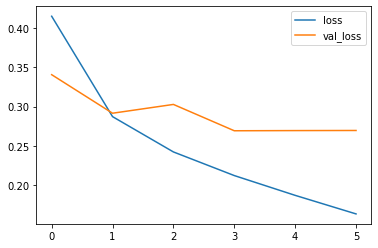

In [99]:
# plot the loss values between train and test data

metrics[['loss', 'val_loss']].plot()

<AxesSubplot:>

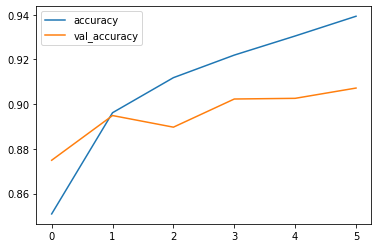

In [100]:
# plot the accuracy values between train and test data

metrics[['accuracy', 'val_accuracy']].plot()

### Evaluating the Model

In [65]:
# evaluation metrics defined during model compilation

model.metrics_names

['loss', 'accuracy']

In [101]:
# evaluate using test data

model.evaluate(x_test, y_cat_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.2695 - accuracy: 0.9072


[0.26947683095932007, 0.9071999788284302]

In [102]:
# get predictions probabilities

test_preds = model.predict(x_test)

313/313 [==============================] - 2s 7ms/step


In [103]:
# get prediction class labels

test_preds_class = np.argmax(test_preds, axis = 1)
test_preds_class

array([9, 2, 1, ..., 8, 1, 7], dtype=int64)

In [77]:
## import libraries for evaluation

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [104]:
# check the accuracy score

accuracy_score(y_test, test_preds_class)

0.9072

In [105]:
print(classification_report(y_test, test_preds_class))

              precision    recall  f1-score   support

           0       0.90      0.84      0.87      1000
           1       0.99      0.97      0.98      1000
           2       0.87      0.85      0.86      1000
           3       0.89      0.92      0.91      1000
           4       0.86      0.82      0.84      1000
           5       0.99      0.96      0.98      1000
           6       0.72      0.81      0.76      1000
           7       0.92      0.98      0.95      1000
           8       0.99      0.97      0.98      1000
           9       0.98      0.94      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



## Thank you!!